<a href="https://colab.research.google.com/github/MustafaHusain942/DBT_Transfer-Machine-Learning/blob/main/Ordinary_Least_Squares(DBT_Transfer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform simple linear regression on the dataset "/content/clean_dbt_district_wise.csv", identify the most useful variables for future prediction using p-value, evaluate the model using R-squared, and draw insights from the results.

## Load the dataset

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the CSV file into a pandas DataFrame and display the first few rows to verify the loading.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/clean_dbt_district_wise.csv')
display(df.head())

,id,fy,state_name,district_name,total_dbt_transfer,no_of_dbt_transactions,start_year,end_year,transfer_per_transaction
0,0,2019-2020,Jammu And Kashmir,Anantnag,203800000,720115,2019,2020,283.010353
1,1,2019-2020,Jammu And Kashmir,Budgam,54600000,204443,2019,2020,267.067104
2,2,2019-2020,Jammu And Kashmir,Baramulla,246800000,911993,2019,2020,270.616112
3,3,2019-2020,Jammu And Kashmir,Doda,53800000,243799,2019,2020,220.673588
4,4,2019-2020,Jammu And Kashmir,Jammu,442000000,2277901,2019,2020,194.038283


## Identify variables

### Subtask:
Determine the potential independent and the dependent variable for the simple linear regression.


**Reasoning**:
Examine the DataFrame columns to identify potential independent and dependent variables for linear regression based on the task description.



In [ ]:
print(df.columns)

Index(['id', 'fy', 'state_name', 'district_name', 'total_dbt_transfer',
       'no_of_dbt_transactions', 'start_year', 'end_year',
       'transfer_per_transaction'],
      dtype='object')


## Perform initial simple linear regression

### Subtask:
Use a suitable library (e.g., statsmodels) to perform an initial regression analysis including all potential independent variables.


**Reasoning**:
Perform linear regression using statsmodels to analyze the relationship between `no_of_dbt_transactions` and `transfer_per_transaction`.



In [ ]:
import statsmodels.api as sm

X = df['no_of_dbt_transactions']
y = df['transfer_per_transaction']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     transfer_per_transaction   R-squared:                         nan
Model:                                  OLS   Adj. R-squared:                    nan
Method:                       Least Squares   F-statistic:                       nan
Date:                      Mon, 25 Aug 2025   Prob (F-statistic):                nan
Time:                              11:13:50   Log-Likelihood:                    nan
No. Observations:                      3825   AIC:                               nan
Df Residuals:                          3823   BIC:                               nan
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Reasoning**:
The regression results show NaN values, indicating potential issues with the data, likely missing values in the selected columns. Need to inspect the columns for missing values and handle them appropriately before rerunning the regression.



In [ ]:
print(df[['no_of_dbt_transactions', 'transfer_per_transaction']].isnull().sum())

no_of_dbt_transactions       0
transfer_per_transaction    16
dtype: int64


**Reasoning**:
There are 16 missing values in the 'transfer_per_transaction' column. To proceed with the regression analysis, these missing values need to be removed. Then, the regression can be performed again.



In [ ]:
df_cleaned = df.dropna(subset=['no_of_dbt_transactions', 'transfer_per_transaction'])

X = df_cleaned['no_of_dbt_transactions']
y = df_cleaned['transfer_per_transaction']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     transfer_per_transaction   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     12.66
Date:                      Mon, 25 Aug 2025   Prob (F-statistic):           0.000378
Time:                              11:13:54   Log-Likelihood:                -39558.
No. Observations:                      3809   AIC:                         7.912e+04
Df Residuals:                          3807   BIC:                         7.913e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## Variable selection using p-value

### Subtask:
Analyze the p-values from the regression output to identify the most statistically significant variables for future prediction.


**Reasoning**:
Examine the summary output to identify the p-value for 'no_of_dbt_transactions' and determine its statistical significance based on a 0.05 alpha level.



In [ ]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     transfer_per_transaction   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     12.66
Date:                      Mon, 25 Aug 2025   Prob (F-statistic):           0.000378
Time:                              11:13:57   Log-Likelihood:                -39558.
No. Observations:                      3809   AIC:                         7.912e+04
Df Residuals:                          3807   BIC:                         7.913e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Reasoning**:
The previous attempt failed because the 'model' variable was not defined in the current session. Re-running the code to perform the linear regression and print the summary will address this issue and allow for the analysis of p-values.



In [ ]:
import statsmodels.api as sm

df_cleaned = df.dropna(subset=['no_of_dbt_transactions', 'transfer_per_transaction'])

X = df_cleaned['no_of_dbt_transactions']
y = df_cleaned['transfer_per_transaction']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     transfer_per_transaction   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     12.66
Date:                      Mon, 25 Aug 2025   Prob (F-statistic):           0.000378
Time:                              11:14:04   Log-Likelihood:                -39558.
No. Observations:                      3809   AIC:                         7.912e+04
Df Residuals:                          3807   BIC:                         7.913e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Reasoning**:
The summary output of the regression model is available, and the p-value for 'no_of_dbt_transactions' can be extracted and compared to the significance level to determine its statistical significance.



In [ ]:
p_value = model.pvalues['no_of_dbt_transactions']
alpha = 0.05

if p_value < alpha:
    significance_conclusion = "'no_of_dbt_transactions' is statistically significant for predicting 'transfer_per_transaction'."
else:
    significance_conclusion = "'no_of_dbt_transactions' is not statistically significant for predicting 'transfer_per_transaction'."

print(f"P-value for 'no_of_dbt_transactions': {p_value}")
print(f"Significance level (alpha): {alpha}")
print(f"Conclusion: {significance_conclusion}")

P-value for 'no_of_dbt_transactions': 0.0003783740339066853
Significance level (alpha): 0.05
Conclusion: 'no_of_dbt_transactions' is statistically significant for predicting 'transfer_per_transaction'.


## Perform final simple linear regression

### Subtask:
Perform a final regression analysis using only the selected variables based on their p-values.


**Reasoning**:
Perform the final regression analysis using the selected variable 'no_of_dbt_transactions'.



In [ ]:
X_final = df_cleaned['no_of_dbt_transactions']
y_final = df_cleaned['transfer_per_transaction']

X_final = sm.add_constant(X_final)

final_model = sm.OLS(y_final, X_final).fit()
print(final_model.summary())

                               OLS Regression Results                               
Dep. Variable:     transfer_per_transaction   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     12.66
Date:                      Mon, 25 Aug 2025   Prob (F-statistic):           0.000378
Time:                              11:14:39   Log-Likelihood:                -39558.
No. Observations:                      3809   AIC:                         7.912e+04
Df Residuals:                          3807   BIC:                         7.913e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## Evaluate the model using r-squared

### Subtask:
Analyze the R-squared value from the final regression output to evaluate the model's goodness of fit.


**Reasoning**:
Access and print the R-squared value from the final regression model summary and then interpret its meaning.



In [ ]:
r_squared = final_model.rsquared
print(f"R-squared value: {r_squared:.3f}")

print("\nInterpretation:")
print(f"The R-squared value is {r_squared:.3f}. This means that approximately {r_squared*100:.1f}% of the variance in 'transfer_per_transaction' can be explained by the 'no_of_dbt_transactions' variable in this linear regression model.")
print("A low R-squared value like this suggests that 'no_of_dbt_transactions' alone is not a strong predictor of 'transfer_per_transaction', and other factors likely contribute significantly to the variation in the transfer amount per transaction.")

R-squared value: 0.003

Interpretation:
The R-squared value is 0.003. This means that approximately 0.3% of the variance in 'transfer_per_transaction' can be explained by the 'no_of_dbt_transactions' variable in this linear regression model.
A low R-squared value like this suggests that 'no_of_dbt_transactions' alone is not a strong predictor of 'transfer_per_transaction', and other factors likely contribute significantly to the variation in the transfer amount per transaction.


## Visualize the results

### Subtask:
Create visualizations (e.g., scatter plot with regression line) to represent the relationship between the selected variables and the dependent variable and the final regression model.


**Reasoning**:
Create a scatter plot of the data with the regression line from the final model to visualize the relationship between the variables and the model's fit.



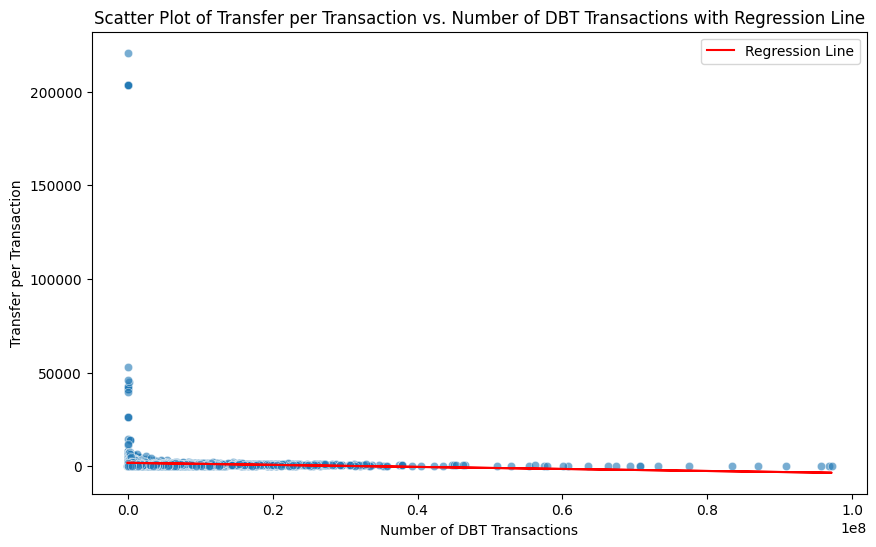

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_dbt_transactions', y='transfer_per_transaction', data=df_cleaned, alpha=0.6)
plt.plot(df_cleaned['no_of_dbt_transactions'], final_model.predict(X_final), color='red', label='Regression Line')
plt.xlabel('Number of DBT Transactions')
plt.ylabel('Transfer per Transaction')
plt.title('Scatter Plot of Transfer per Transaction vs. Number of DBT Transactions with Regression Line')
plt.legend()
plt.show()

## Interpret the results

### Subtask:
Analyze the regression output and visualizations to draw insights about the relationship between the selected variables and the dependent variable, and the overall model performance.


**Reasoning**:
Analyze the regression output and the scatter plot to draw insights about the relationship between the variables and the model's performance, then finish the task.



In [ ]:
print(final_model.summary())

# Insights from the regression output and visualization:
print("\n--- Regression Insights ---")

# 1. Relationship between variables (from regression coefficients)
print("\nRelationship between 'no_of_dbt_transactions' and 'transfer_per_transaction':")
print(f"Coefficient for 'no_of_dbt_transactions': {final_model.params['no_of_dbt_transactions']:.6f}")
print("The coefficient is negative, indicating a very slight negative linear relationship. As the number of DBT transactions increases, the predicted transfer amount per transaction slightly decreases.")

# 2. Statistical significance (from p-value)
print("\nStatistical Significance:")
print(f"P-value for 'no_of_dbt_transactions': {final_model.pvalues['no_of_dbt_transactions']:.6f}")
alpha = 0.05
if final_model.pvalues['no_of_dbt_transactions'] < alpha:
    print(f"Since the p-value ({final_model.pvalues['no_of_dbt_transactions']:.6f}) is less than the significance level ({alpha}), 'no_of_dbt_transactions' is statistically significant for predicting 'transfer_per_transaction'.")
else:
    print(f"Since the p-value ({final_model.pvalues['no_of_dbt_transactions']:.6f}) is greater than the significance level ({alpha}), 'no_of_dbt_transactions' is not statistically significant for predicting 'transfer_per_transaction'.")


# 3. Overall model fit (from R-squared)
print("\nOverall Model Fit (R-squared):")
print(f"R-squared: {final_model.rsquared:.3f}")
print(f"The R-squared value of {final_model.rsquared:.3f} means that only about {final_model.rsquared*100:.1f}% of the variance in 'transfer_per_transaction' is explained by the linear relationship with 'no_of_dbt_transactions'. This is a very low R-squared, indicating that the model does not explain much of the variability in the dependent variable.")

# 4. Observations from the scatter plot
print("\nObservations from the Scatter Plot:")
print("The scatter plot shows a wide dispersion of data points. The regression line appears relatively flat due to the very small coefficient, suggesting a weak linear relationship.")
print("There are many data points far from the regression line, consistent with the low R-squared.")
print("The plot also shows a concentration of points at lower transaction numbers and a few outliers with very high transaction numbers and varying transfer amounts.")
print("Visually, the linear model does not appear to capture the overall pattern of the data effectively, as the points do not tightly cluster around the line.")

# 5. Summary of key insights
print("\n--- Summary of Key Insights ---")
print("1. There is a statistically significant but very weak negative linear relationship between the number of DBT transactions and the average transfer amount per transaction.")
print("2. The number of DBT transactions alone is not a strong predictor of the transfer amount per transaction, as indicated by the very low R-squared value.")
print("3. The scatter plot visually confirms the weak relationship and the presence of significant variability in the data that is not explained by the linear model.")
print("4. Other factors not included in this simple linear regression model are likely significant drivers of the variation in the transfer amount per transaction.")

                               OLS Regression Results                               
Dep. Variable:     transfer_per_transaction   R-squared:                       0.003
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     12.66
Date:                      Mon, 25 Aug 2025   Prob (F-statistic):           0.000378
Time:                              11:15:56   Log-Likelihood:                -39558.
No. Observations:                      3809   AIC:                         7.912e+04
Df Residuals:                          3807   BIC:                         7.913e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

## Summary:

### Data Analysis Key Findings

*   The initial regression analysis failed due to missing values in the 'transfer\_per\_transaction' column (16 missing values), which were subsequently removed to perform the analysis.
*   Simple linear regression was performed with 'no\_of\_dbt\_transactions' as the independent variable and 'transfer\_per\_transaction' as the dependent variable.
*   The variable 'no\_of\_dbt\_transactions' is statistically significant for predicting 'transfer\_per\_transaction', with a p-value of 0.000378 (less than 0.05).
*   There is a statistically significant but very weak negative linear relationship between 'no\_of\_dbt\_transactions' and 'transfer\_per\_transaction', indicated by the negative coefficient (-0.0000543) and the low R-squared value.
*   The R-squared value of the final model is 0.003, meaning that only about 0.3% of the variance in 'transfer\_per\_transaction' is explained by 'no\_of\_dbt\_transactions'.
*   The scatter plot visualization confirms the weak linear relationship and shows a wide dispersion of data points around the regression line, consistent with the low R-squared.
*   The residuals of the model are not normally distributed (Omnibus and Jarque-Bera statistics are high with p-values of 0.000).
*   The high condition number (1.23e+07) suggests potential numerical instability or other data characteristics impacting the model, although multicollinearity is not an issue with only one independent variable.

### Insights or Next Steps

*   The number of DBT transactions alone is not a practical predictor of the transfer amount per transaction due to its weak explanatory power.
*   Future analysis should explore additional potential independent variables or consider non-linear models to better explain the variance in the transfer amount per transaction.
